In [1]:
import matplotlib.pyplot as plt
import neatplot
import seaborn as sns
import pandas
import pickle
import numpy as np
import pandas as pd
from pathlib import Path

neatplot.set_style("fonts")

In [2]:
path = Path("./")
data = []
for p in path.rglob("*"):
    if not p.stem.startswith("seed"):
        continue
    exp_dir = p
    with open(exp_dir / "settings.pkl", "rb") as f:
        settings = pickle.load(f)
    print(settings)
    true_costs = np.load(exp_dir / "true_costs.npy")
    areas = np.load(exp_dir / "areas.npy")
    for iteration, samples in enumerate(zip(true_costs, areas)):
        for true_cost, area in zip(*samples):
            data.append((settings["acq_func"], settings["seed"], iteration, true_cost, area))

{'seed': 5, 'grid_size': 20, 'n_init': 1, 'n_iter': 400, 'plot': True, 'n_path': 20, 'can_requery': True, 'acq_func': 'rand', 'save_dir': './'}
{'seed': 4, 'grid_size': 20, 'n_init': 1, 'n_iter': 400, 'plot': True, 'n_path': 20, 'can_requery': True, 'acq_func': 'rand', 'save_dir': './'}
{'seed': 3, 'grid_size': 20, 'n_init': 1, 'n_iter': 400, 'plot': True, 'n_path': 20, 'can_requery': True, 'acq_func': 'rand', 'save_dir': './'}
{'seed': 1, 'grid_size': 20, 'n_init': 1, 'n_iter': 400, 'plot': True, 'n_path': 20, 'can_requery': True, 'acq_func': 'rand', 'save_dir': './'}
{'seed': 2, 'grid_size': 20, 'n_init': 1, 'n_iter': 400, 'plot': True, 'n_path': 20, 'can_requery': True, 'acq_func': 'rand', 'save_dir': './'}
{'seed': 5, 'grid_size': 20, 'n_init': 1, 'n_iter': 400, 'plot': True, 'n_path': 20, 'can_requery': True, 'acq_func': 'bax', 'save_dir': './'}
{'seed': 4, 'grid_size': 20, 'n_init': 1, 'n_iter': 400, 'plot': True, 'n_path': 20, 'can_requery': True, 'acq_func': 'bax', 'save_dir': 

In [3]:
labels = ("acqfunc", "seed", "iteration", "truecost", "area")
df = pd.DataFrame(data, columns=labels)

In [4]:
df["weightedscore"] = (df["truecost"] - 1.2101668955885854) * df["area"]

In [5]:
df_averaged_over_samples = df.groupby(["acqfunc", "seed", "iteration"]).mean().reset_index()

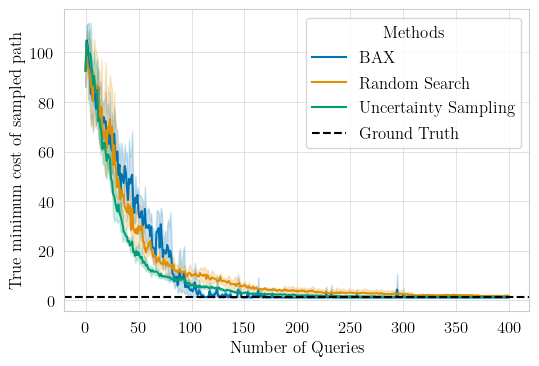

In [6]:
fig, ax = plt.subplots()
sns.lineplot(data=df_averaged_over_samples, x="iteration", y="truecost", ax=ax, hue="acqfunc")

ax.axhline(1.2101668955885854, linestyle="--", color="k", label="Ground Truth")
#ax.axvline(915, color="r", linestyle="--", label="Exact Dijkstras")
ax.legend()
#ax.set(xscale="log", yscale="log")
#ax.set(xlim=[30, 400])
#ax.set(ylim=[0, 50])

ax.set(xlabel="Number of Queries",
       ylabel="True minimum cost of sampled path")
legend = ax.legend()
legend.set_title("Methods")
for t, l in zip(legend.texts,("BAX", "Random Search", "Uncertainty Sampling")):
    t.set_text(l)

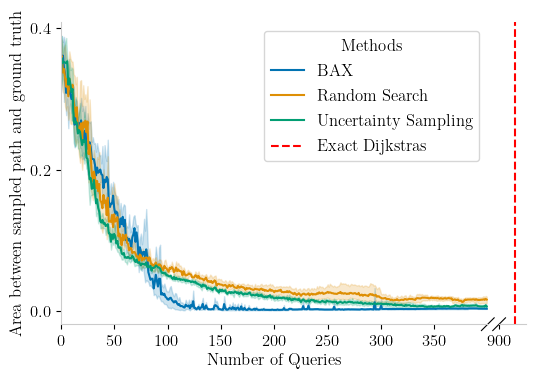

In [7]:
from brokenaxes import brokenaxes
baxes = brokenaxes(xlims=((0,400),(900, 925)), wspace=.05)
fig = baxes.fig
ax, ax2 = baxes.axs

sns.lineplot(data=df_averaged_over_samples, x="iteration", y="area", ax=ax, hue="acqfunc")

ax.set(xlabel="Number of Queries",
       ylabel="Area between sampled path and ground truth")
ax.grid(False)
#for t, l in zip(legend.texts,("BAX", "Random Search", "Uncertainty Sampling")):
#    t.set_text(l)
start, end = ax.get_xlim()
stepsize = 50
ax.xaxis.set_ticks(np.arange(start, end, stepsize))

    
handles, labels = ax.get_legend_handles_labels()

ax2.axvline(915, color="r", linestyle="--", label="Exact Dijkstras")
ax2.grid(False)
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, stepsize))

handles = handles + [ax2.lines[1]]
labels =["BAX", "Random Search", "Uncertainty Sampling", "Exact Dijkstras"]

legend = ax.legend(handles, labels)
legend.set_title("Methods")

fig.savefig("area.pdf", bbox_inches = 'tight')
fig.savefig("area.png", bbox_inches = 'tight')

# Maybe noisiness comes from allowing bax to requery same edge?

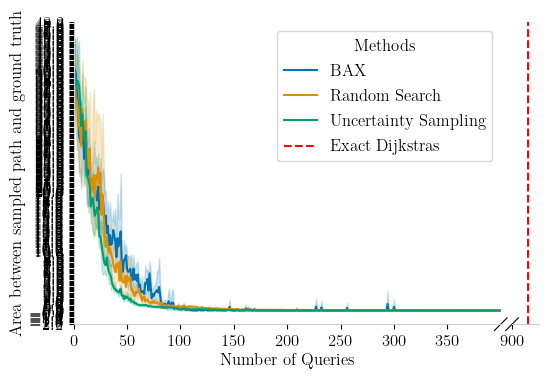

In [8]:
from brokenaxes import brokenaxes
baxes = brokenaxes(xlims=((0,400),(900, 925)), wspace=.05)
fig = baxes.fig
ax, ax2 = baxes.axs

sns.lineplot(data=df_averaged_over_samples, x="iteration", y="weightedscore", ax=ax, hue="acqfunc")

ax.set(xlabel="Number of Queries",
       ylabel="Area between sampled path and ground truth")
ax.grid(False)
#for t, l in zip(legend.texts,("BAX", "Random Search", "Uncertainty Sampling")):
#    t.set_text(l)
start, end = ax.get_xlim()
stepsize = 50
ax.xaxis.set_ticks(np.arange(start, end, stepsize))

    
handles, labels = ax.get_legend_handles_labels()

ax2.axvline(915, color="r", linestyle="--", label="Exact Dijkstras")
ax2.grid(False)
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, stepsize))

handles = handles + [ax2.lines[1]]
labels =["BAX", "Random Search", "Uncertainty Sampling", "Exact Dijkstras"]

legend = ax.legend(handles, labels)
legend.set_title("Methods")

fig.savefig("weighted_area.pdf", bbox_inches = 'tight')
fig.savefig("weighted_area.png", bbox_inches = 'tight')

In [9]:
df_averaged_over_samples["weightedscore"]

0       30.012358
1       38.349965
2       37.217278
3       38.825927
4       46.879976
          ...    
5995     0.000855
5996     0.001064
5997     0.000772
5998     0.000772
5999     0.003550
Name: weightedscore, Length: 6000, dtype: float64